In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import rankdata

In [2]:
df = pd.read_csv("data.csv")
df.index = pd.to_datetime(df['date'], format='%Y-%m-%d')
df = df.drop('date', axis=1)

close_columns = []
high_columns = []
low_columns = []
open_columns = []
volume_columns = []
open_int_columns = []

for i in df.columns:
    if "close" in i:
        close_columns.append(i)
    elif "high" in i:
        high_columns.append(i)
    elif "low" in i:
        low_columns.append(i)
    elif "open_int" in i:
        open_int_columns.append(i)
    elif "open" in i:
        open_columns.append(i)
    elif "volume" in i:
        volume_columns.append(i)
        
close_df = df[close_columns]
high_df = df[high_columns]
low_df = df[low_columns]
open_df = df[open_columns]
volume_df = df[volume_columns]
open_int_df = df[open_int_columns]

In [3]:
df.tail()

,AN_open,AN_high,AN_low,AN_close,AN_volume,AN_open_int,BN_open,BN_high,BN_low,BN_close,...,UB_low,UB_close,UB_volume,UB_open_int,AX_open,AX_high,AX_low,AX_close,AX_volume,AX_open_int
date,,,,,,,,,,,,,,,,,,,,,
2019-06-17,68.91,69.02,68.67,68.69,71826.0,202496.0,126.46,126.58,125.83,125.91,...,134.02,134.11,752301.0,1250472.0,12094.5,12112.0,12043.0,12082.0,282803.0,100579.0
2019-06-18,68.72,69.00,68.49,68.92,100420.0,178401.0,125.86,126.16,125.56,126.11,...,134.08,134.61,538366.0,1250617.0,12073.5,12345.5,11969.5,12321.5,177881.0,111770.0
2019-06-19,68.94,69.27,68.73,69.08,127610.0,179027.0,126.08,127.25,125.94,127.19,...,134.24,134.45,472803.0,1229089.0,12340.0,12342.5,12271.0,12298.0,167701.0,112906.0
2019-06-20,69.01,69.53,68.97,69.40,91477.0,173103.0,126.96,127.76,126.93,127.48,...,134.33,134.43,442713.0,1214201.0,12333.0,12425.5,12305.5,12361.5,131392.0,114006.0
2019-06-21,69.43,69.56,69.21,69.44,91477.0,173103.0,127.52,127.95,126.89,127.85,...,134.20,134.26,442713.0,1214201.0,12347.0,12410.5,12253.5,12270.0,131392.0,114006.0


## Signals

In [4]:
# daily data
returns_daily = close_df.pct_change().dropna()
vol_daily = returns_daily.ewm(adjust=True, com=60, min_periods=0).std().dropna()

#monthly data
returns_monthly = close_df.pct_change(20).dropna().resample('BM').last().ffill()
vol_monthly = (np.sqrt(261)*vol_daily).resample('BM').last().ffill()

In [6]:
vol_monthly.head()

,AN_close,BN_close,CC_close,CN_close,CT_close,DA_close,DX_close,EC_close,EN_close,ES_close,...,ZU_close,ZW_close,ZZ_close,DT_close,HS_close,LX_close,NK_close,SP_close,UB_close,AX_close
date,,,,,,,,,,,,,,,,,,,,,
1999-06-30,0.105042,0.062671,0.340395,0.079590,0.208741,0.117408,0.057450,0.006805,0.273889,0.171174,...,0.376478,0.145714,0.381138,0.073597,0.217934,0.083019,0.097903,0.171116,0.032165,0.126013
1999-07-30,0.102485,0.092296,0.367361,0.053053,0.248199,0.228037,0.072208,0.004424,0.272543,0.151698,...,0.301792,0.282767,0.413881,0.073126,0.311318,0.224145,0.188760,0.151480,0.041537,0.218992
1999-08-31,0.100980,0.087018,0.317635,0.065784,0.233056,0.262282,0.082101,0.005188,0.283183,0.173361,...,0.290636,0.255201,0.383358,0.071736,0.313992,0.221060,0.191588,0.173167,0.040713,0.222227
1999-09-30,0.098992,0.082781,0.351501,0.061236,0.229098,0.270938,0.080132,0.005897,0.294703,0.186051,...,0.270916,0.260535,0.352725,0.075146,0.293303,0.209225,0.184466,0.186178,0.043353,0.216286
1999-10-29,0.101794,0.082981,0.329411,0.055821,0.218192,0.297339,0.086932,0.006833,0.308855,0.217140,...,0.377323,0.247127,0.351677,0.075506,0.329189,0.212675,0.189809,0.217070,0.043262,0.213240


# TSMOM

In [39]:
def signal2(df, date, passive, method):
        
    num_assets = len(df.iloc[-1])
    signal = []
    
    if method == "momentum":
        
        returns = df.pct_change(20 * 12).resample('BM').last().ffill()[:date]
        
        if passive:
            signal = np.ones(num_assets)
        else:
            signal = np.where(returns.iloc[-1] > 0, 1, -1)
            
    elif method == "momentum_lagged":
        
        returns_12 = df.pct_change(21 * 12).resample('BM').last().ffill()[:date]
        
        returns_6 = df.pct_change(21 * 6).resample('BM').last().ffill()[:date]
        
        returns_3 = df.pct_change(21 * 3).resample('BM').last().ffill()[:date]
        
        momentum_mean = (returns_12.iloc[-1] + returns_6.iloc[-1] + returns_3.iloc[-1]) / 3
        
        
        if passive:
            signal = np.ones(num_assets)
        else:
            signal = np.where(momentum_mean > 0, 1, -1)
        
                
    return signal
    
def tsmom (df,returns_monthly, vol_monthly,date, method = 'momentum', risk=0.4, passive=False, momentum_window=12):
    
    position = signal2(df, date, passive, method)
        
    weights = (risk / vol_monthly.iloc[date-1])
    
    weights /= len(weights)
    
    portfolio = position * weights
    
    return (1+np.dot(portfolio, returns_monthly.iloc[date]))

# CSMOM

In [68]:
def signal(df, date):
        
    num_assets = len(df.iloc[-1])
    signal = []
        
    returns = df.pct_change(20 * 12).resample('BM').last().ffill()[:date]
    
    returns_rank = rankdata(returns.iloc[-1])

    signal = np.where(returns_rank > int(num_assets * 0.7), 1, np.where(returns_rank < int(num_assets * 0.3), -1, 0))
              
    return signal
    
def csmom (df,returns_monthly, vol_monthly, date):
    
    position = signal(df, date)
    
    num_assets = len(df.iloc[-1])
    
    weights = 1 / (int(num_assets - num_assets * 0.8) + int(num_assets * 0.2))
    
    print(weights,  int(num_assets * 0.8), int(num_assets * 0.2))
    
    portfolio = position * weights
    
    return (1+np.dot(portfolio, returns_monthly.iloc[date]))

## Classic CSMOM

In [69]:
r = [] # retorno do TSMOM
rp = [] # retorno passivo
start = 12 -1
years = 19
end = 12*(int(start/12) + years)
for i in range(start, end):
    r.append(csmom (close_df,returns_monthly, vol_monthly, date=i))
    rp.append(tsmom (close_df,returns_monthly, vol_monthly, date=i, risk=0.4))

0.05 43 10
0.05 43 10
0.05 43 10
0.05 43 10
0.05 43 10
0.05 43 10
0.05 43 10
0.05 43 10
0.05 43 10
0.05 43 10
0.05 43 10
0.05 43 10
0.05 43 10
0.05 43 10
0.05 43 10
0.05 43 10
0.05 43 10
0.05 43 10
0.05 43 10
0.05 43 10
0.05 43 10
0.05 43 10
0.05 43 10
0.05 43 10
0.05 43 10
0.05 43 10
0.05 43 10
0.05 43 10
0.05 43 10
0.05 43 10
0.05 43 10
0.05 43 10
0.05 43 10
0.05 43 10
0.05 43 10
0.05 43 10
0.05 43 10
0.05 43 10
0.05 43 10
0.05 43 10
0.05 43 10
0.05 43 10
0.05 43 10
0.05 43 10
0.05 43 10
0.05 43 10
0.05 43 10
0.05 43 10
0.05 43 10
0.05 43 10
0.05 43 10
0.05 43 10
0.05 43 10
0.05 43 10
0.05 43 10
0.05 43 10
0.05 43 10
0.05 43 10
0.05 43 10
0.05 43 10
0.05 43 10
0.05 43 10
0.05 43 10
0.05 43 10
0.05 43 10
0.05 43 10
0.05 43 10
0.05 43 10
0.05 43 10
0.05 43 10
0.05 43 10
0.05 43 10
0.05 43 10
0.05 43 10
0.05 43 10
0.05 43 10
0.05 43 10
0.05 43 10
0.05 43 10
0.05 43 10
0.05 43 10
0.05 43 10
0.05 43 10
0.05 43 10
0.05 43 10
0.05 43 10
0.05 43 10
0.05 43 10
0.05 43 10
0.05 43 10
0.05 43 10

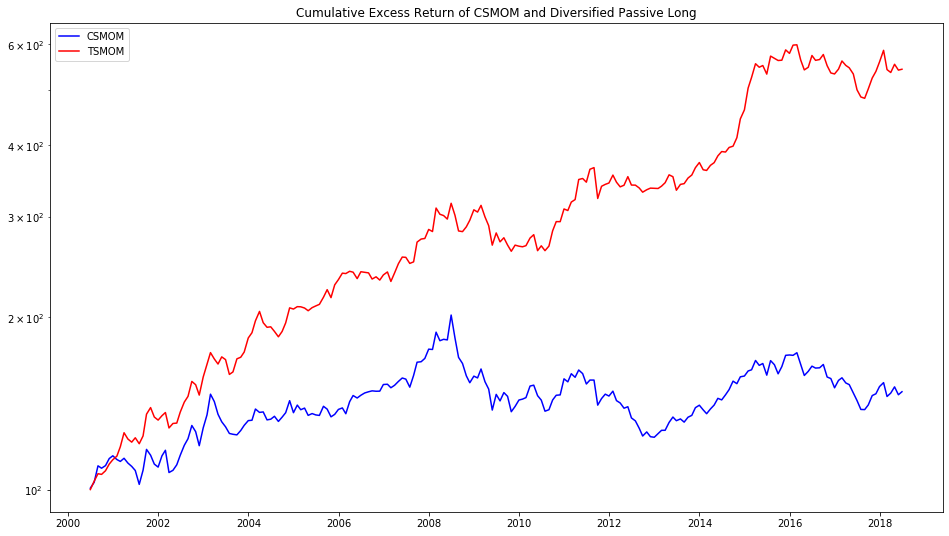

Passive return: 442.73%, Annualized: 9.31%
CSMOM return: 48.27%, Annualized: 2.09%


In [70]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

r = pd.DataFrame(r)
rp = pd.DataFrame(rp)

r.index = returns_monthly.iloc[start:end].index
rp.index = returns_monthly.iloc[start:end].index

plt.figure(figsize=(16,9))

plt.plot(100*r.cumprod(), label = 'CSMOM', color='blue')
plt.plot(100*rp.cumprod(), label = 'TSMOM', color='red')

plt.yscale('log')
plt.legend()
plt.title('Cumulative Excess Return of CSMOM and Diversified Passive Long')
plt.show()

tsmom_return = float((rp.cumprod().iloc[-1] - 1)*100)
csmom_return = float((r.cumprod().iloc[-1] - 1)*100)

print('Passive return: ', round(tsmom_return,2), '%,',
     " Annualized: ", round((((100+tsmom_return)/100) ** (1/years) - 1)*100 , 2), "%", sep='')

print('CSMOM return: ', round(csmom_return,2), "%,",
     " Annualized: ", round((((100+csmom_return)/100) ** (1/years) - 1)*100 , 2), "%", sep='')